#### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import minmax_scale, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, silhouette_score, adjusted_rand_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
warnings.filterwarnings('ignore')

## Data Processing

In [14]:
from google.colab import drive
import os
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/242B Final Project/features_3_sec.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


###### We don't need the column 'filename' so let's remove it

In [16]:
data = data.drop(columns=['filename'])
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


#### Checking for missing values

In [17]:
data.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

Class Distribution:
label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64


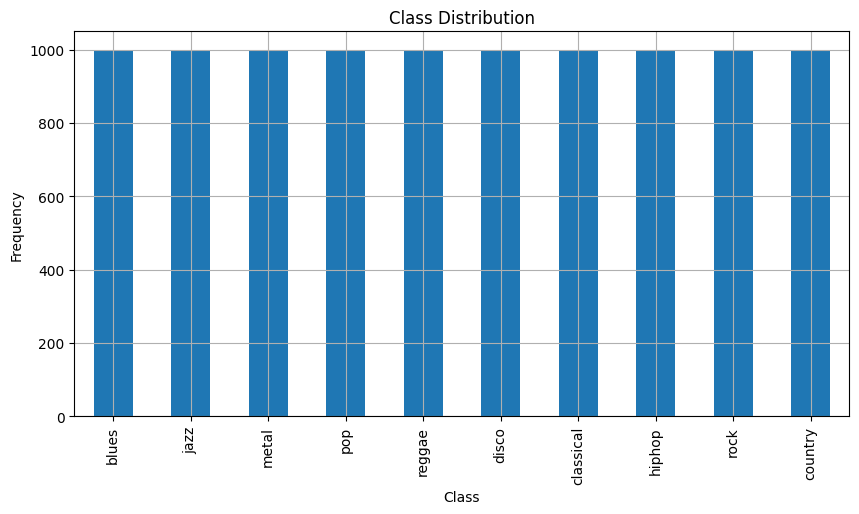

In [18]:
class_counts = data.iloc[:, -1].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Plotting the class distribution
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Input variables (X) and Output variable (Y)

In [19]:
y = data['label']
X = data.loc[:, data.columns != 'label']
features = X
labels = y
labels = np.array(labels).reshape(9990)

###### Normalizing X so that all the values are in the same range (0,1)

In [20]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)

#### Splitting the data into training and testing (80-20)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# checking the shape of X_train and X_test
X_train.shape, X_test.shape

((7992, 58), (1998, 58))

####  Function to assess the accuracy of a model

In [24]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy using', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Logistic Regression

In [25]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

Accuracy using Logistic Regression : 0.7012 



#### Confusion Matrix - Logistic Regression

Accuracy : 0.7012 



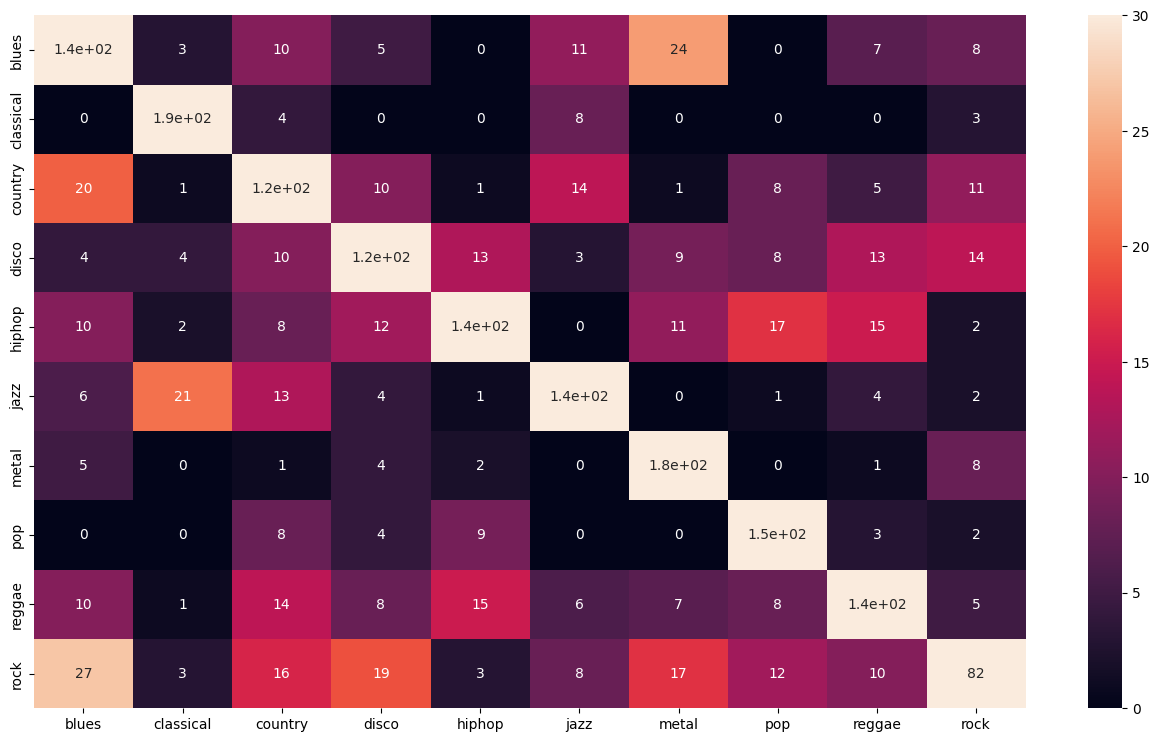

In [26]:
lg.fit(X_train, y_train)

preds = lg.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, annot=True, vmax = 30,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
#plt.savefig('plots/Confusion Matrix - Logistic Regression Base Model.png')

#### Logistic Regression Classification Report

In [27]:
lg_classificationReport = classification_report(y_test, preds)
print(lg_classificationReport)

              precision    recall  f1-score   support

       blues       0.63      0.67      0.65       208
   classical       0.84      0.93      0.88       203
     country       0.58      0.62      0.60       186
       disco       0.65      0.61      0.63       199
      hiphop       0.76      0.65      0.70       218
        jazz       0.74      0.73      0.73       192
       metal       0.73      0.90      0.80       204
         pop       0.74      0.86      0.79       180
      reggae       0.70      0.65      0.67       211
        rock       0.60      0.42      0.49       197

    accuracy                           0.70      1998
   macro avg       0.70      0.70      0.70      1998
weighted avg       0.70      0.70      0.70      1998



## Random Forest

In [28]:
grid_values = {'max_features': np.linspace(1, 15, 15, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [100],
               'random_state': [42]}

rf = RandomForestClassifier()

cv = KFold(n_splits=5, random_state=333, shuffle=True)
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   1.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   0.9s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   0.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   2.0s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=100, random_state=42; total time=   1.4s
[CV] END max_features=2, min_samples_leaf=5, n_e

GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [100],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

(0.7, 0.85)

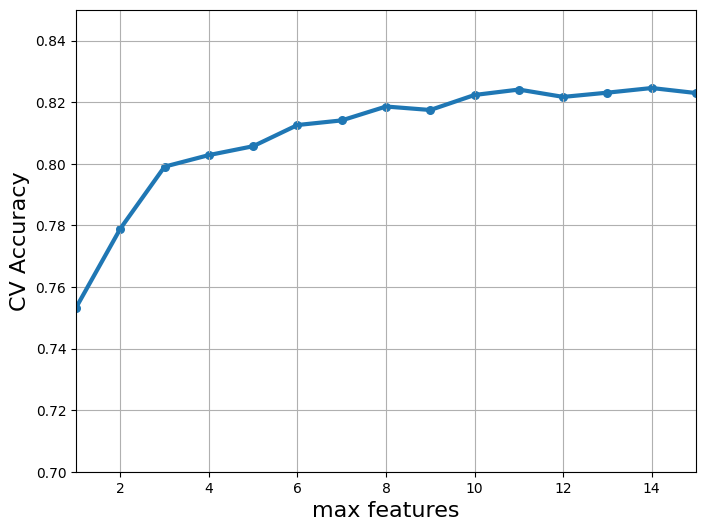

In [29]:
# Select the best max_features with the highest accuracy in CV

max_features = rf_cv.cv_results_['param_max_features'].data
Accuracy = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, Accuracy, s=30)
plt.plot(max_features, Accuracy, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 15])
plt.ylim([0.7,0.85])

In [30]:
print(rf_cv.best_params_)

{'max_features': 14, 'min_samples_leaf': 5, 'n_estimators': 100, 'random_state': 42}


In [31]:
# Predict on the test data
y_pred = rf_cv.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8503503503503503

Classification Report:
               precision    recall  f1-score   support

       blues       0.86      0.83      0.85       208
   classical       0.91      0.98      0.95       203
     country       0.74      0.82      0.78       186
       disco       0.80      0.80      0.80       199
      hiphop       0.87      0.82      0.84       218
        jazz       0.83      0.90      0.86       192
       metal       0.88      0.94      0.91       204
         pop       0.89      0.91      0.90       180
      reggae       0.86      0.83      0.84       211
        rock       0.86      0.69      0.76       197

    accuracy                           0.85      1998
   macro avg       0.85      0.85      0.85      1998
weighted avg       0.85      0.85      0.85      1998



In [32]:
model_assess(rf_cv.best_estimator_, "Random Forest")

Accuracy using Random Forest : 0.85035 



### Support Vector Machine

In [33]:
# Train the SVM model
svm = SVC(kernel='linear',random_state = 12345)
svm.fit(X_train, y_train)

# Predict and evaluate the model
predictions = svm.predict(X_test)

# Predict and evaluate the model
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))
model_assess(svm, "Support Vector Machine")

              precision    recall  f1-score   support

       blues       0.67      0.77      0.71       208
   classical       0.85      0.96      0.90       203
     country       0.67      0.66      0.66       186
       disco       0.62      0.63      0.63       199
      hiphop       0.78      0.72      0.75       218
        jazz       0.81      0.79      0.80       192
       metal       0.81      0.91      0.86       204
         pop       0.80      0.87      0.83       180
      reggae       0.77      0.66      0.71       211
        rock       0.61      0.44      0.51       197

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.74      1998
weighted avg       0.74      0.74      0.74      1998

Accuracy using Support Vector Machine : 0.74124 



#### Confusion Matrix - SVM

Accuracy : 0.74124 



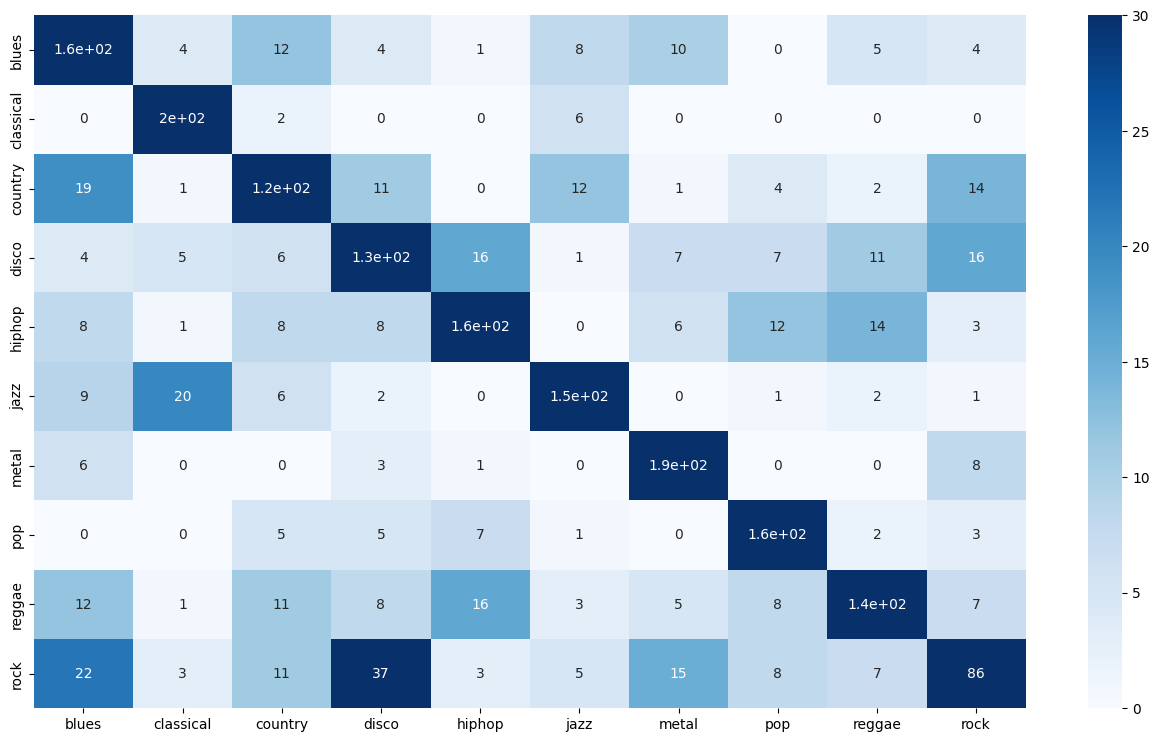

In [34]:
print('Accuracy', ':', round(accuracy_score(y_test, predictions), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, predictions) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, vmax = 30,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
#plt.savefig('plots/Confusion Matrix - SVM Base Model.png')

#### TRY different cost of misclassification in Linear Kernel

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
margSVC=SVC(kernel='linear',C = 0.1, random_state = 12345)
margSVC.fit(X_train, y_train)
margSVC_results = margSVC.predict(X_test)
print(confusion_matrix(y_test, margSVC_results))
print(classification_report(y_test, margSVC_results))

[[142   4   4   4   1  14  22   0   5  12]
 [  1 187   5   1   0   7   0   0   0   2]
 [ 50   1  71   9   1  21   1  10   5  17]
 [  5   4   5  73  22   2  20  36  12  20]
 [ 11   1  10  23 109   2  17  24  20   1]
 [  9  20  12  11   0 137   0   0   2   1]
 [ 10   0   0   4   1   0 183   0   1   5]
 [  0   1  10   2   3   0   0 158   5   1]
 [ 21   1  14   3  16   4   7  15 125   5]
 [ 36   1  12  27   2  11  27  12   9  60]]
              precision    recall  f1-score   support

       blues       0.50      0.68      0.58       208
   classical       0.85      0.92      0.88       203
     country       0.50      0.38      0.43       186
       disco       0.46      0.37      0.41       199
      hiphop       0.70      0.50      0.58       218
        jazz       0.69      0.71      0.70       192
       metal       0.66      0.90      0.76       204
         pop       0.62      0.88      0.73       180
      reggae       0.68      0.59      0.63       211
        rock       0.48     

In [39]:
margSVC=SVC(kernel='linear',C = 100, random_state = 12345)
margSVC.fit(X_train, y_train)
margSVC_results = margSVC.predict(X_test)
print(confusion_matrix(y_test,margSVC_results))
print(classification_report(y_test,margSVC_results))

[[168   1  12   5   0   4   5   0   8   5]
 [  1 194   1   0   0   7   0   0   0   0]
 [ 18   2 134   8   1   5   0   3   1  14]
 [  5   3   8 139  10   3   4   7  10  10]
 [  9   1  10  10 165   0   0   8  13   2]
 [  7   9   6   2   0 164   0   1   1   2]
 [  3   0   0   4   2   0 183   0   0  12]
 [  0   0   5   5   7   1   0 158   3   1]
 [  9   1  10   9  22   3   5   7 136   9]
 [ 13   1  19  23   3   3  14   7   6 108]]
              precision    recall  f1-score   support

       blues       0.72      0.81      0.76       208
   classical       0.92      0.96      0.93       203
     country       0.65      0.72      0.69       186
       disco       0.68      0.70      0.69       199
      hiphop       0.79      0.76      0.77       218
        jazz       0.86      0.85      0.86       192
       metal       0.87      0.90      0.88       204
         pop       0.83      0.88      0.85       180
      reggae       0.76      0.64      0.70       211
        rock       0.66     

### SVM with poly kernel

In [40]:
svm_poly = SVC(kernel='poly')

# Define the parameter grid: values to try for 'degree'
param_grid = {'degree': [1, 2, 3, 4, 5, 6]}

# Set up GridSearchCV to find the best 'degree'
grid_search = GridSearchCV(estimator=svm_poly, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the results for each degree
results = pd.DataFrame(grid_search.cv_results_)
display_columns = ['param_degree', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_display = results[display_columns]

# Print the results for each degree
print("Results for each degree:")
print(results_display)

# Get the best model found
best_model = grid_search.best_estimator_

# Test the best model
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Print the best results
print("Best degree:", grid_search.best_params_['degree'])
print("Best model accuracy on test set:", accuracy)

Results for each degree:
  param_degree  mean_test_score  std_test_score  rank_test_score
0            1         0.683057        0.005515                6
1            2         0.743743        0.005764                5
2            3         0.791541        0.008066                4
3            4         0.834334        0.004437                3
4            5         0.870870        0.006014                2
5            6         0.878377        0.003940                1
Best degree: 6
Best model accuracy on test set: 0.8958958958958959


### SVM Grid Search with all possible parameters

In [ ]:
# Measure time
start_time = time.process_time()

# Parameters including degree for the polynomial kernel
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1,10],
    'degree': [4, 5, 6]  # Adding degrees for the polynomial kernel
}

svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

# Time taken
elapsed_time = time.process_time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

# Display best parameters
print("Best parameters found:", clf.best_params_)

# Test the best model on the test dataset
best_model = clf.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the best model on the test set:", accuracy)

Elapsed time: 2344.076986609 seconds
Best parameters found: {'C': 10, 'degree': 4, 'gamma': 1, 'kernel': 'rbf'}
Accuracy of the best model on the test set: 0.9209209209209209


In [42]:
best_svm=SVC(kernel='rbf',C = 10, gamma=1)
best_svm.fit(X_train, y_train)
best_svm_results = best_svm.predict(X_test)
print(confusion_matrix(y_test,best_svm_results))
print(classification_report(y_test,best_svm_results))

[[196   0   3   2   1   3   0   0   1   2]
 [  0 199   0   0   0   4   0   0   0   0]
 [  8   0 165   2   0   2   0   2   1   6]
 [  1   3   3 176   2   1   1   2   3   7]
 [  1   1   6   3 198   0   0   3   2   4]
 [  2   8   3   0   0 177   0   0   2   0]
 [  1   0   1   0   1   0 199   0   0   2]
 [  0   0   1   2   1   1   0 171   3   1]
 [  0   1   2   6   4   2   0   1 195   0]
 [  3   1   8  10   2   1   6   0   2 164]]
              precision    recall  f1-score   support

       blues       0.92      0.94      0.93       208
   classical       0.93      0.98      0.96       203
     country       0.86      0.89      0.87       186
       disco       0.88      0.88      0.88       199
      hiphop       0.95      0.91      0.93       218
        jazz       0.93      0.92      0.92       192
       metal       0.97      0.98      0.97       204
         pop       0.96      0.95      0.95       180
      reggae       0.93      0.92      0.93       211
        rock       0.88     

## KNN Model

In [43]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.94      0.91      0.92       208
   classical       0.91      0.97      0.94       203
     country       0.83      0.89      0.86       186
       disco       0.88      0.92      0.90       199
      hiphop       0.93      0.88      0.90       218
        jazz       0.91      0.90      0.90       192
       metal       0.98      0.97      0.97       204
         pop       0.96      0.90      0.93       180
      reggae       0.91      0.92      0.92       211
        rock       0.88      0.85      0.87       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998

[[189   1   6   0   1   5   0   0   2   4]
 [  0 197   1   0   0   5   0   0   0   0]
 [  4   0 166   3   0   4   0   0   3   6]
 [  1   4   3 183   2   1   0   0   2   3]
 [  2   0   5   6 191   1   1   7   3   2]
 [  2  13   4   0   0 172 

In [44]:
## Compute correlations
#corr = data.corr()

# Plot the correlations
#plt.figure(figsize=(24,20))
#sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.show()


## KNN Means Clustering Model

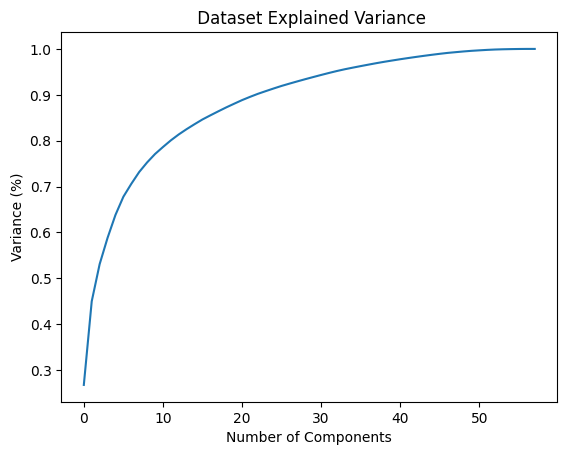

In [45]:
#Choosing the Number of Components in a Principal Component Analysis

pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(' Dataset Explained Variance')
plt.show()

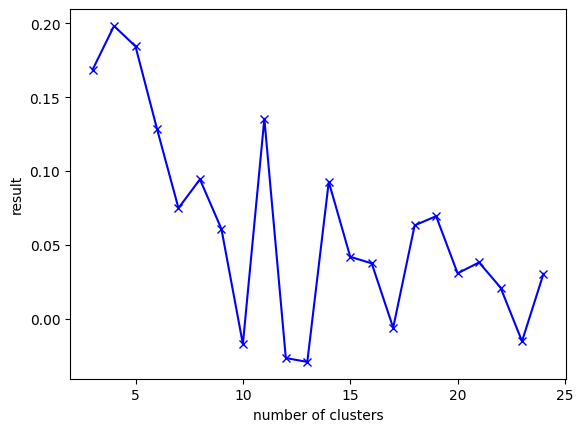

In [46]:
result = []
#n_clusters=3
for n_clusters in list (range(3,25)):
   clusterer = KMeans (n_clusters=n_clusters, init = 'k-means++').fit(X)
   preds = clusterer.predict(X)
   centers = clusterer.cluster_centers_
   result.append(silhouette_score(X, preds, sample_size = 26))

import matplotlib.pyplot as plt
plt.plot(range(3,25), result, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('result')

plt.show()

In [47]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
n_clusters = 10

clusterer = KMeans (n_clusters=n_clusters, init = 'k-means++').fit(principalComponents)
preds = clusterer.predict(principalComponents)

label_encoder = LabelEncoder()
true_labels_numerical = label_encoder.fit_transform(y)

# Calculate the Rand Score
ari_score = adjusted_rand_score(true_labels_numerical, preds)

print(f'Adjusted Rand Score: {ari_score}')

Adjusted Rand Score: 0.1676393516258315


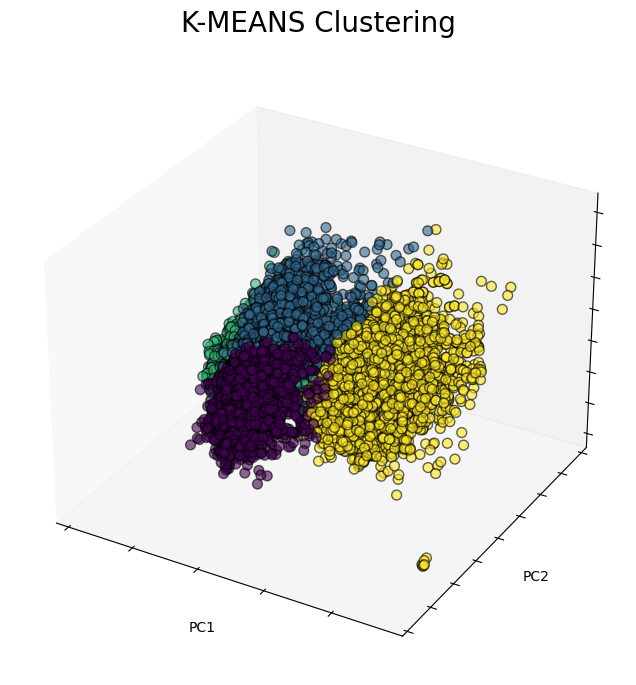

In [48]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
n_clusters = 4

clusterer = KMeans (n_clusters=n_clusters, init = 'k-means++').fit(principalComponents)
preds = clusterer.predict(principalComponents)
labels = clusterer.labels_


# plt for kmeans
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2],
                     c=labels, cmap='viridis', edgecolor='k', s=50, alpha=0.6)

# Title and labels
plt.title('K-MEANS Clustering', fontsize=20, pad=20)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Remove grid lines and ticks
ax.grid(False)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Set background color to white
#ax.set_facecolor('white')

# Show plot
plt.show()

## Fully Connected NN

In [49]:
X = data.drop('label', axis=1)
y = data['label']

# Convert labels to integers
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(y)

y_encoded = to_categorical(y_integers)

# Preprocess the data: scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Predict classes
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

# Generate and print the classification report
report = classification_report(true_classes, predicted_classes)
print(report)


Epoch 1/10
250/250 [==============================] - 4s 8ms/step - loss: 1.2903 - accuracy: 0.5492 - val_loss: 0.9090 - val_accuracy: 0.6917
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.8034 - accuracy: 0.7285 - val_loss: 0.7522 - val_accuracy: 0.7397
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.6609 - accuracy: 0.7780 - val_loss: 0.6937 - val_accuracy: 0.7633
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5605 - accuracy: 0.8111 - val_loss: 0.5993 - val_accuracy: 0.7903
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4884 - accuracy: 0.8361 - val_loss: 0.5807 - val_accuracy: 0.7998
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.8541 - val_loss: 0.5209 - val_accuracy: 0.8383
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3773 - accuracy: 0.8771 - val_loss: 0.4828 - val_accuracy: 0.8428
Epoch 

NN Model Tuning

In [50]:
# Function to create model with dynamic parameters
def create_model(neurons=32, activation='relu'):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(input_shape,)),
        Dense(neurons, activation=activation),  # Example of a second layer
        Dense(number_of_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1]
number_of_classes = y_train.shape[1]

# Define grid of hyperparameters
neurons = [32, 64, 128]
activations = ['relu', 'tanh']
batch_sizes = [32, 64]
epochs = [10, 20]

# Manual grid search
best_accuracy = 0
best_params = {}

for neuron in neurons:
    for activation in activations:
        for batch_size in batch_sizes:
            for epoch in epochs:
                model = create_model(neurons=neuron, activation=activation)
                model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch, verbose=0)
                _, accuracy = model.evaluate(X_test, y_test, verbose=0)
                print(f"Tested: neurons={neuron}, activation={activation}, batch_size={batch_size}, epochs={epoch}, accuracy={accuracy:.4f}")

                # Update best model if current model is better
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'neurons': neuron, 'activation': activation, 'batch_size': batch_size, 'epochs': epoch}

print(f"Best accuracy: {best_accuracy:.4f} with params {best_params}")

Tested: neurons=32, activation=relu, batch_size=32, epochs=10, accuracy=0.7683
Tested: neurons=32, activation=relu, batch_size=32, epochs=20, accuracy=0.8223
Tested: neurons=32, activation=relu, batch_size=64, epochs=10, accuracy=0.7578
Tested: neurons=32, activation=relu, batch_size=64, epochs=20, accuracy=0.7948
Tested: neurons=32, activation=tanh, batch_size=32, epochs=10, accuracy=0.7768
Tested: neurons=32, activation=tanh, batch_size=32, epochs=20, accuracy=0.8113
Tested: neurons=32, activation=tanh, batch_size=64, epochs=10, accuracy=0.7618
Tested: neurons=32, activation=tanh, batch_size=64, epochs=20, accuracy=0.7928
Tested: neurons=64, activation=relu, batch_size=32, epochs=10, accuracy=0.8258
Tested: neurons=64, activation=relu, batch_size=32, epochs=20, accuracy=0.8493
Tested: neurons=64, activation=relu, batch_size=64, epochs=10, accuracy=0.8148
Tested: neurons=64, activation=relu, batch_size=64, epochs=20, accuracy=0.8514
Tested: neurons=64, activation=tanh, batch_size=32, 

In [51]:
# Create and train the best model
best_nn = create_model(neurons=128, activation='tanh')
best_nn.fit(X_train, y_train, batch_size=32, epochs=20, verbose=0)

In [5]:
# Compare the test accuracy of the RNN and LSTM models in table
data = {'Model': ['Logistic Regression', 'KNN','SVM','Random Forest','Neural Network'],
        'Test Accuracy':  ['0.7012','0.91','0.92','0.85','0.9034'],
        }
df = pd.DataFrame(data)
df

,Model,Test Accuracy
0,Logistic Regression,0.7012
1,KNN,0.91
2,SVM,0.92
3,Random Forest,0.85
4,Neural Network,0.9034
